## Content
- [Cleaning and removing duplicates](#Cleaning-and-removing-duplicates)
- [Preprocessing Text Data](#Preprocessing-Text-Data)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import regex as re
import requests

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Importing data
bball_df = pd.read_csv('../datasets/bball_df.csv')
fball_df = pd.read_csv('../datasets/fball_df.csv')

## Cleaning and removing duplicates

In [3]:
bball_df.head() # data scrapped from r/Basketball

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,media,is_video,comments,post_hint,url_overridden_by_dest,preview,link_flair_template_id,poll_data,crosspost_parent_list,crosspost_parent
0,NaN,Basketball,Admins have banned other subs for this.\n\nNo ...,t2_aj47j,False,NaN,0.0,False,RULE REMINDER: You cannot Post Offers to Trade...,[],...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,What are your recommendations on increasing yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,how about just giving someone a free jump prog...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
bball_df.info() # plenty of empty selftext, total 3332 comments/posts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4677 entries, 0 to 4676
Columns: 112 entries, approved_at_utc to crosspost_parent
dtypes: float64(37), object(75)
memory usage: 4.0+ MB


In [5]:
fball_df.head() # data scrapped from r/soccer

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,created_utc,num_crossposts,media,is_video,comments,url_overridden_by_dest,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,soccer,This thread is for general football discussion...,t2_2glav0rp,False,NaN,0.0,False,Daily Discussion,"[{'e': 'text', 't': 'Daily Discussion'}]",...,1.601497e+09,0.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Marega will tear Laporte a new one,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,RIP Porto.,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,So Ruben Dias moved to England only to keep ge...,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"So why couldn't United get group C or H, when ...",NaN,NaN,NaN,NaN,NaN


In [6]:
fball_df.info() # plenty of empty selftext, total 4701 comments/posts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Columns: 109 entries, approved_at_utc to author_cakeday
dtypes: float64(32), object(77)
memory usage: 5.7+ MB


In [7]:
bball_df['subreddit'] = 0
fball_df['subreddit'] = 1
# Classifying basketball as 0 and soccer as 1

In [8]:
combine = pd.concat([bball_df, fball_df]).reset_index().drop(columns='index')
# Concatenating both subreddits dataframe together
combine.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,comments,post_hint,url_overridden_by_dest,preview,link_flair_template_id,poll_data,crosspost_parent_list,crosspost_parent,media_metadata,author_cakeday
0,NaN,0,Admins have banned other subs for this.\n\nNo ...,t2_aj47j,False,NaN,0.0,False,RULE REMINDER: You cannot Post Offers to Trade...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,What are your recommendations on increasing yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Got it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,how about just giving someone a free jump prog...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
combine = combine[['title','selftext','comments','subreddit']]
# Getting only columns that we want

In [10]:
combine.isna().sum()
# Columns with NaN values

title         9274
selftext     10419
comments      2243
subreddit        0
dtype: int64

In [11]:
combine['title'] = combine['title'].apply(lambda clean : '' if type(clean) == float else clean)
combine['selftext'] = combine['selftext'].apply(lambda clean : '' if type(clean) == float else clean)
combine['comments'] = combine['comments'].apply(lambda clean : '' if type(clean) == float else clean)
# cleaning title, selftext and comments columns

In [12]:
combine.isna().sum()
#  Removed Nan by replacing NaN values with ''

title        0
selftext     0
comments     0
subreddit    0
dtype: int64

In [13]:
combine['text'] = combine['title'] + ' ' + combine['selftext'] + ' ' + combine['comments']
# Combining the title, selftext and comments to form a string of words

In [14]:
combine['text'].nunique()
# Number of unique texts

8396

In [15]:
len(combine['text'])
# Total number of texts

11517

In [16]:
combine.drop_duplicates(subset = ['text'], inplace = True)
# Drop all the duplicates

In [17]:
len(combine['text'])
# Checking if total number of texts after dropping duplicates matches number of unique

8396

In [18]:
combine.head() # We will clean text column and analyse it

,title,selftext,comments,subreddit,text
0,RULE REMINDER: You cannot Post Offers to Trade...,Admins have banned other subs for this.\n\nNo ...,,0,RULE REMINDER: You cannot Post Offers to Trade...
1,,,What are your recommendations on increasing yo...,0,What are your recommendations on increasing ...
2,,,Got it,0,Got it
4,,,how about just giving someone a free jump prog...,0,how about just giving someone a free jump pr...
5,,,Boo,0,Boo


## Preprocessing Text Data

In [19]:
p_stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
stop_words |= set(['icon','sprite','sub', 'txtblack', 'http', 'www'])
# Adding CSS class icon into list of words to remove
swear_words_corpus = requests.get("http://www.cs.cmu.edu/~biglou/resources/bad-words.txt").text # Swear words to be removed
swear_words = re.sub('[\n]', ' ', swear_words_corpus)
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

def processing_text(texts): # Function to process texts

    word = re.sub('[^a-zA-Z]',' ',texts.lower())    # Remove non-letters and convert all to lower case
    word = word.split() # Split into individual words
    clean = [p_stemmer.stem(w) for w in word if w not in stop_words] # Removing stopwords and stemming remaining words
    clean = [w for w in clean if w not in swear_words] # Removing swear words
    clean = [w for w in clean if len(w) >= 2] # Remove all words that has single alphabets
    clean = ' '.join(clean)
    return (emoji_pattern.sub(r'', clean)) # no emoji

In [20]:
combine['text'] = combine['text'].apply(processing_text)
# Cleaning text column

In [21]:
combine[combine['text']==''] # Will proceed to remove all these blank text

,title,selftext,comments,subreddit,text
2,,,Got it,0,
5,,,Boo,0,
29,,,Oh hi again,0,
30,,,Ah shit here we go again,0,
43,,,Yea,0,
...,...,...,...,...,...
8991,,,Wtf was that,1,
9107,,,Because he doesn't have eyes on the back of hi...,1,
9133,,,Goddamn,1,
9172,,,Yo. NFL. This man right here.,1,


In [22]:
combine.drop(index = combine[combine['text']==''].index, inplace = True)
#  Dropped all the rows with blank text

## Exploratory Data Analysis

In [23]:
combine['subreddit'].value_counts()
# Number of soccer to basketball posts/comments scrapped where soccer is 1 and basketball is 0

1    4151
0    4086
Name: subreddit, dtype: int64

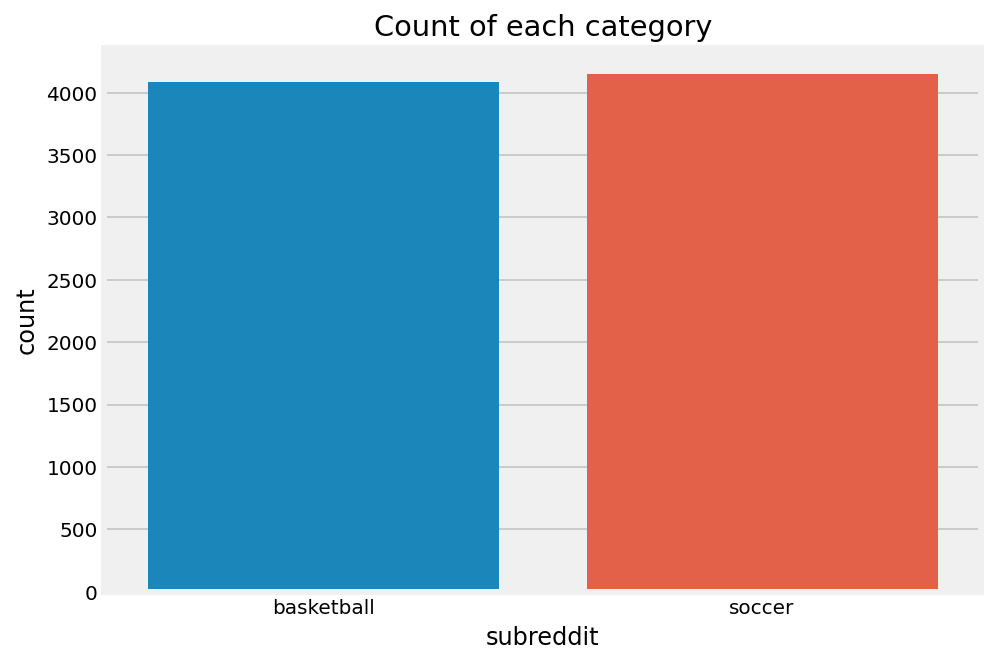

In [24]:
plt.figure(figsize=[7,5])
sns.countplot(combine['subreddit']).set_xticklabels(['basketball','soccer']);
plt.title('Count of each category');
# Well balanced class dataset

In [25]:
bballcvec = CountVectorizer()
bball_cvec = bballcvec.fit_transform(combine[combine['subreddit']==0]['text'])

fballcvec = CountVectorizer()
fball_cvec = fballcvec.fit_transform(combine[combine['subreddit']==1]['text'])

combinecvec = CountVectorizer()
combine_cvec = combinecvec.fit_transform(combine['text'])

# Vectorizing the words for basketball, soccer and combined data

In [26]:
bball_wordcount = pd.DataFrame(bball_cvec.todense(),columns = bballcvec.get_feature_names())
fball_wordcount = pd.DataFrame(fball_cvec.todense(),columns = fballcvec.get_feature_names())
combine_wordcount = pd.DataFrame(combine_cvec.toarray(),columns = combinecvec.get_feature_names())
# Putting the vectorized words into dataframe for analysis

**Count of each word for basketball**

In [27]:
bball_wordcount.sum().sort_values(ascending = False)[:20]
# Top 20 words for basketball subreddit
# The more common the usage of this words in a text/sentence, the higher chance it will be associated to basketball

basketbal    1173
like          988
game          954
good          895
make          738
player        702
work          684
team          661
jump          584
help          547
would         545
practic       541
also          507
know          502
start         488
want          480
need          475
realli        446
year          443
better        426
dtype: int64

In [28]:
bball_wordcount.sum()[bball_wordcount.sum() == 1]
# Basketball words that only occured once
# We will take care of these words with the min_df hyperparamter during our modelling

aaa            1
abandon        1
abdomin        1
abolish        1
abridg         1
              ..
zna            1
znam           1
znoja          1
zombi          1
zvqwtlkgdyy    1
Length: 2178, dtype: int64

**Count of each word for soccer**

In [29]:
fball_wordcount.sum().sort_values(ascending = False)[:20]
# Top 20 words for soccer subreddit
# The more common the usage of this words in a text/sentence, the higher chance it will be associated to soccer

player       572
http         465
goal         448
match        418
like         414
team         393
leagu        360
substitut    355
would        329
game         325
good         301
year         293
season       288
card         279
score        276
sign         252
see          224
wiki         209
first        206
still        200
dtype: int64

In [30]:
fball_wordcount.sum()[fball_wordcount.sum() == 1]
# Football words that only occured once
# We will take care of these words with the min_df hyperparamter during our modelling

aaaaaaaaaaaaaaaaaaaaaaa    1
aaaaaaaaqt                 1
aahh                       1
aalen                      1
aarhu                      1
                          ..
zs                         1
zuculini                   1
zuri                       1
zweiten                    1
zwirn                      1
Length: 3700, dtype: int64

**Top words for basketball and soccer**

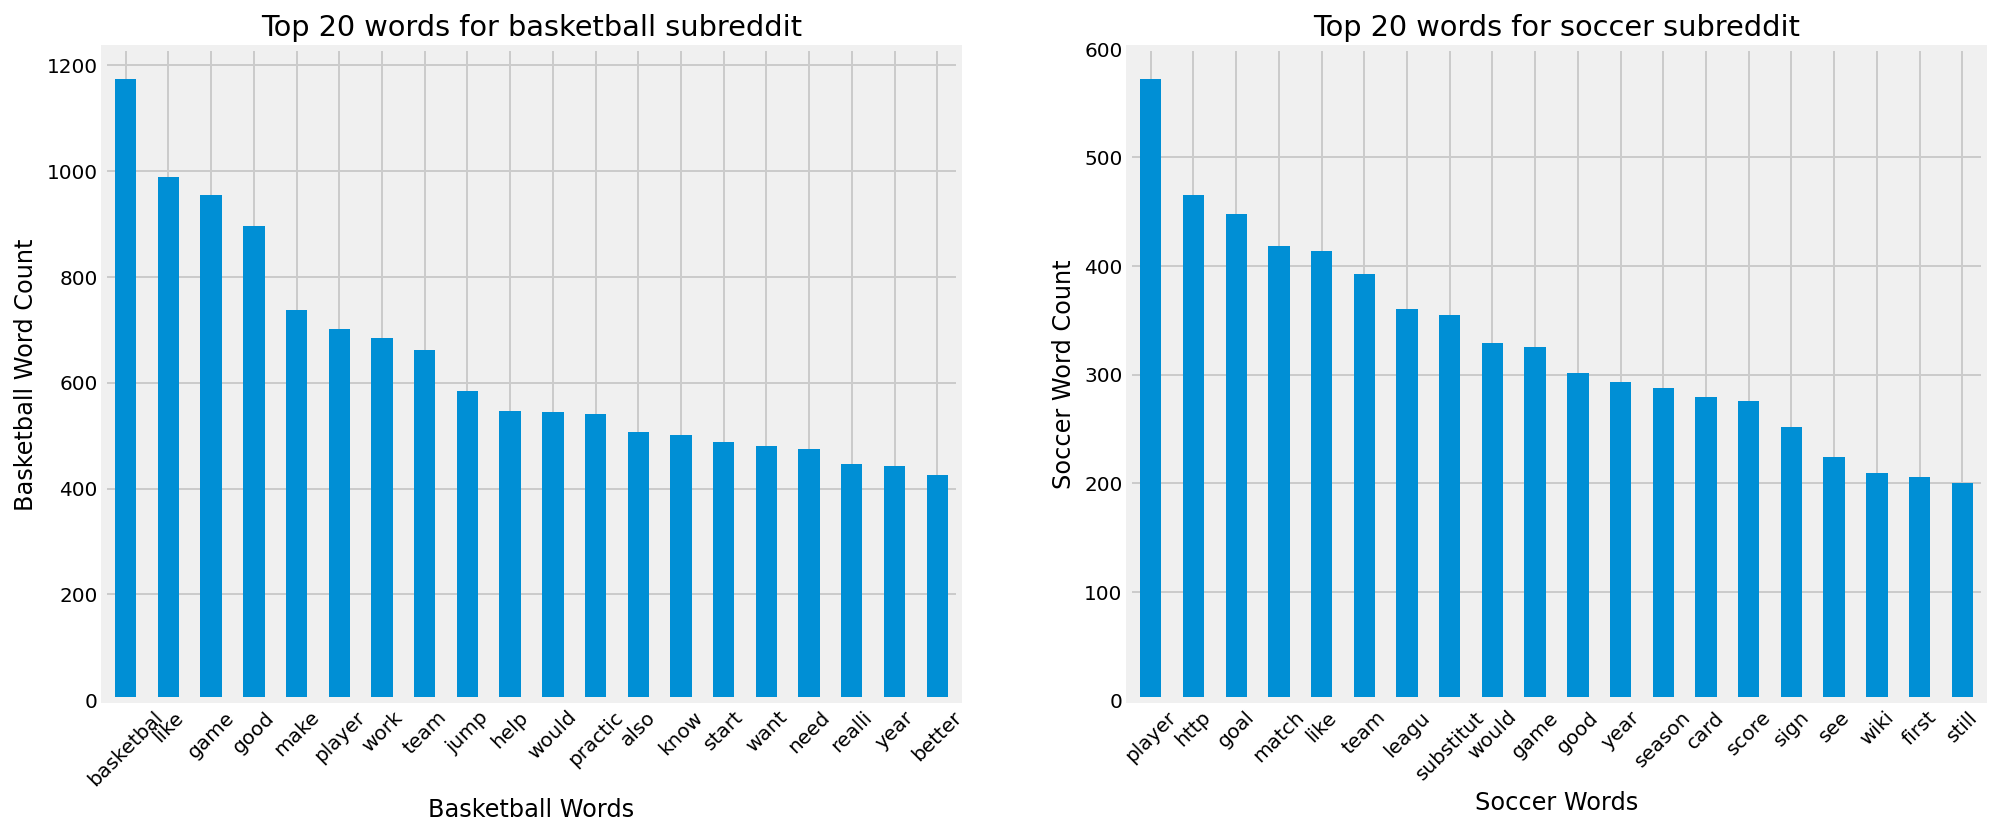

In [31]:
fig, ax = plt.subplots(1,2,figsize=[15,6]);

bball_wordcount.sum().sort_values(ascending = False)[:20].plot(kind = 'bar', ax = ax[0], rot = 45);
fball_wordcount.sum().sort_values(ascending = False)[:20].plot(kind = 'bar', ax = ax[1], rot = 45);

ax[0].set_title('Top 20 words for basketball subreddit');
ax[1].set_title('Top 20 words for soccer subreddit');

ax[0].set_ylabel('Basketball Word Count');
ax[0].set_xlabel('Basketball Words');
ax[1].set_ylabel('Soccer Word Count');
ax[1].set_xlabel('Soccer Words');

# Display of top 20 words from each subreddit

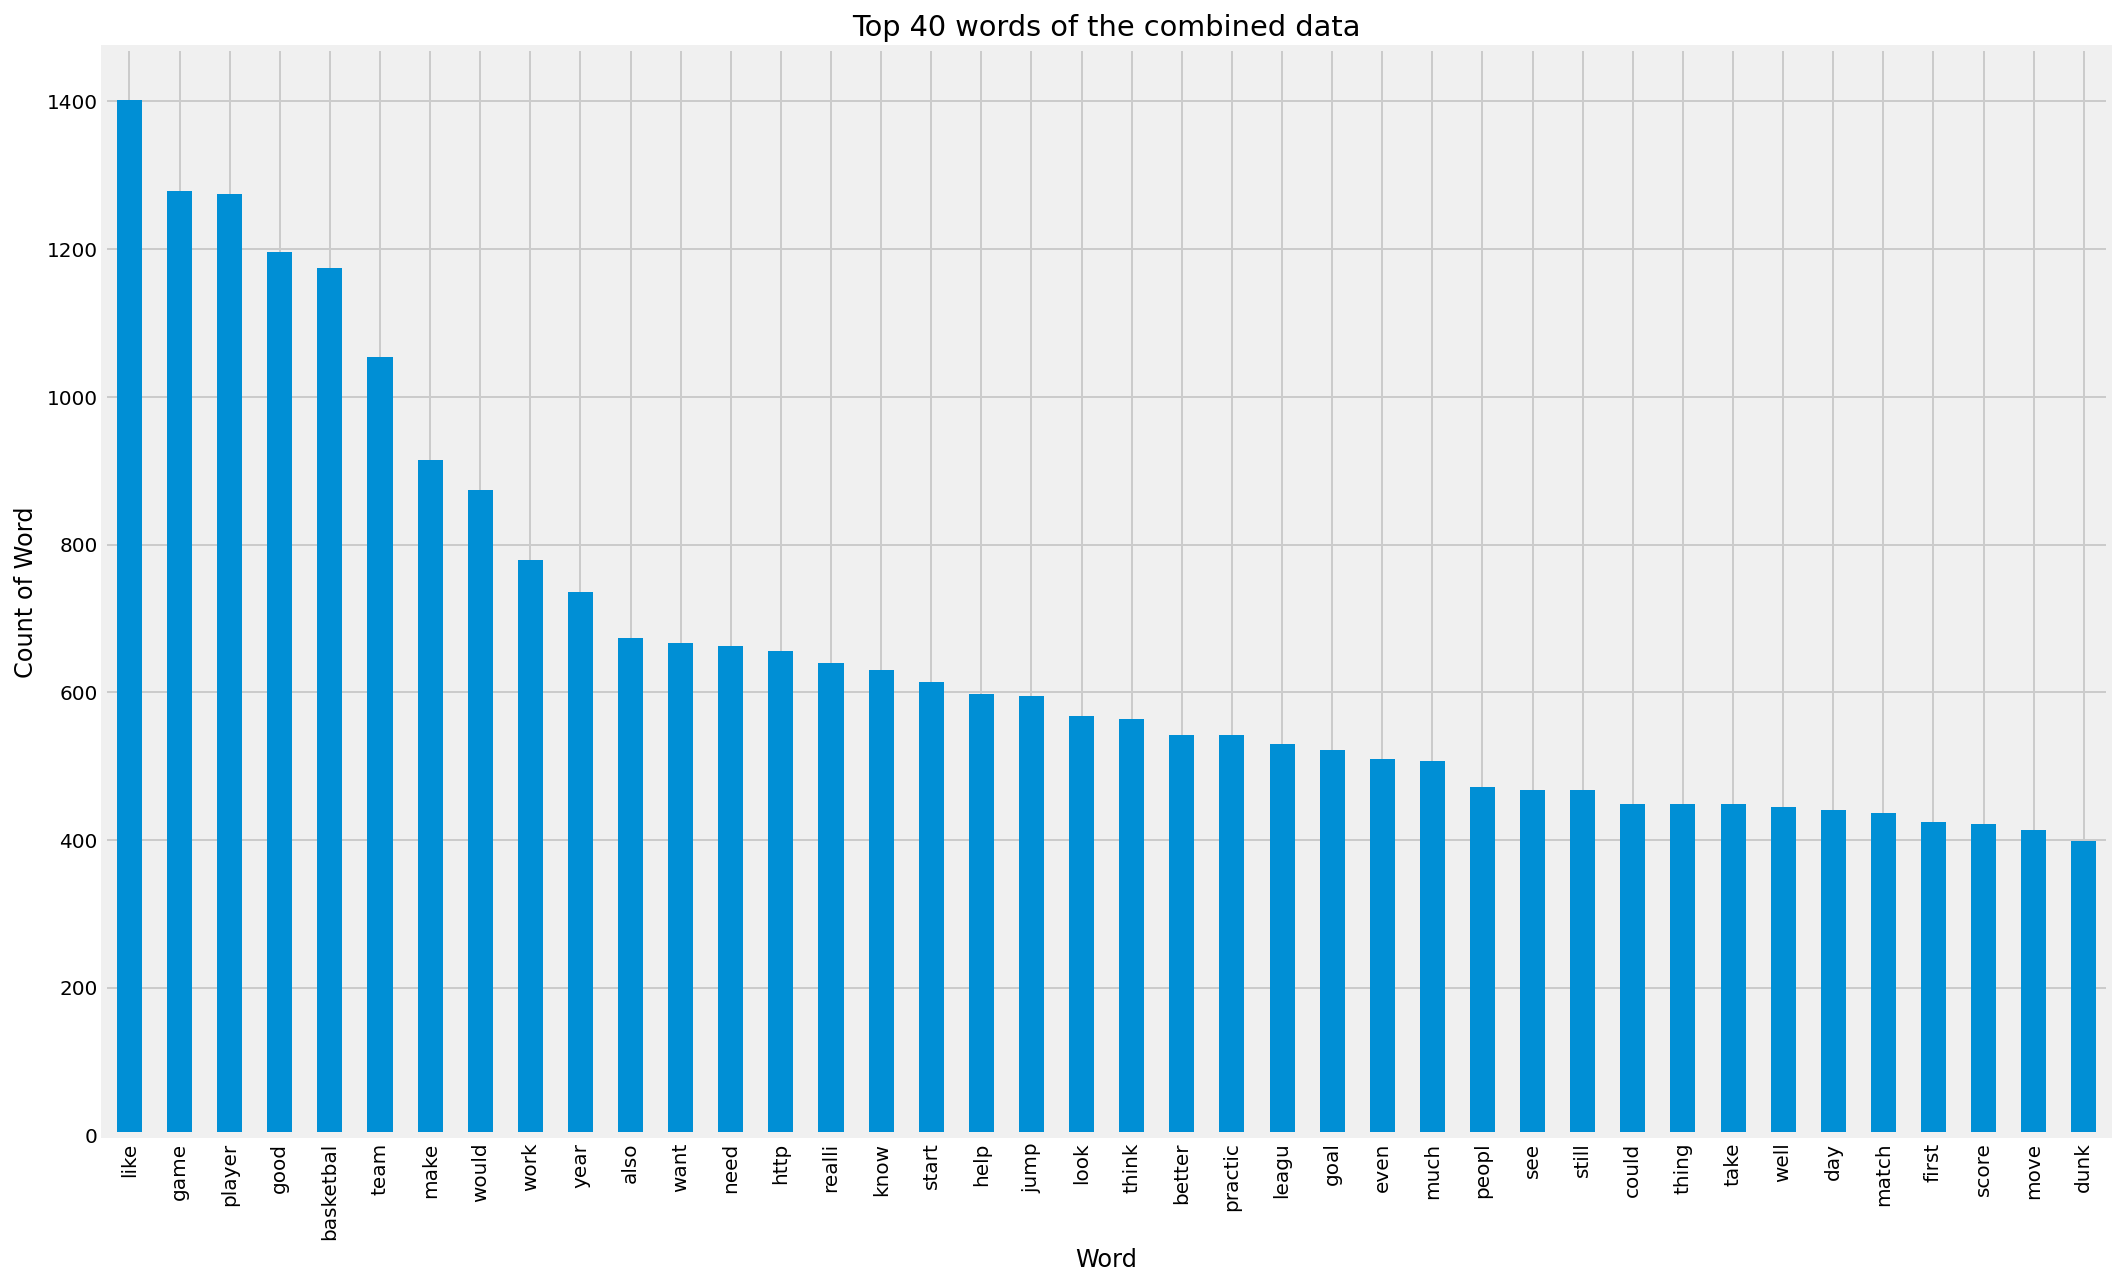

In [32]:
plt.figure(figsize=[16,10]);
combine_wordcount.sum().sort_values(ascending = False)[:40].plot(kind='bar');
plt.title('Top 40 words of the combined data');
plt.xlabel('Word');
plt.ylabel('Count of Word');

Showing the top 40 count of words overall. There seems to be more basketball words than soccer words.

In [33]:
combine.to_csv('../datasets/combine.csv', index = False)
# saving combine dataset to CSV